In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


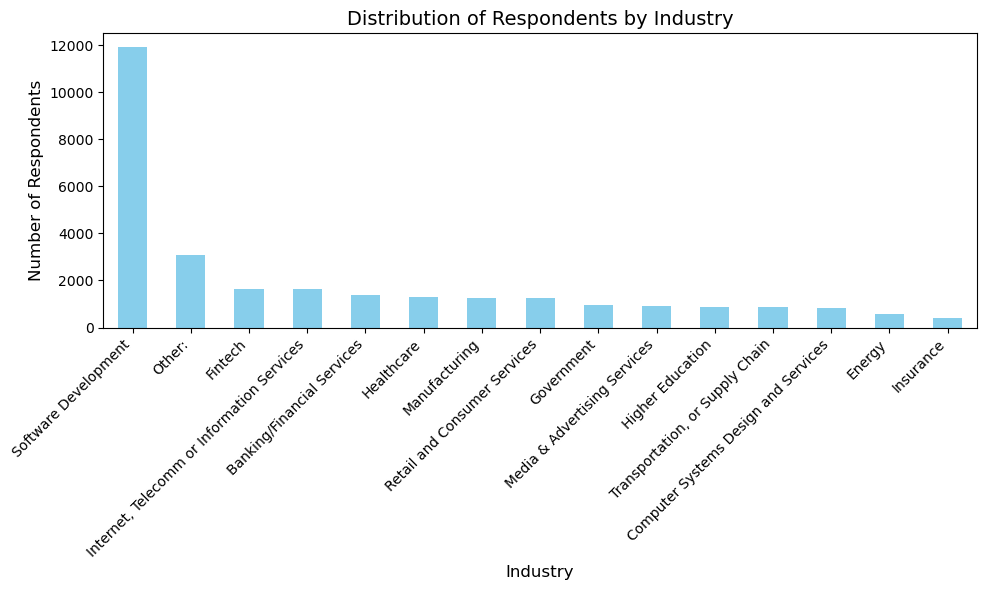

In [3]:
# Check for columns to ensure the 'Industry' column exists (you can inspect the dataset if needed)
print(df.columns)

# Assuming there is a column named 'Industry' or something similar, we will group by industry
industry_counts = df['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
industry_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#In short, by analyzing the distribution of respondents across industries, you may observe:

#Dominant Industries: Some industries may have significantly more respondents, indicating they are overrepresented.

#Underrepresented Industries: A few industries might have very few or no respondents, suggesting gaps in data or focus.

#Skewed Distribution: A few industries may dominate the survey, potentially indicating a targeted audience.

#Balanced Distribution: If distribution is even, it suggests broad and diverse industry representation.

In [4]:
# Calculate basic statistics for 'ConvertedCompYearly'
mean_compensation = df['ConvertedCompYearly'].mean()
median_compensation = df['ConvertedCompYearly'].median()
std_compensation = df['ConvertedCompYearly'].std()

# Define the threshold as 3 standard deviations above the mean
threshold = mean_compensation + 3 * std_compensation

# Identify respondents with compensation values exceeding the threshold
extremely_high_compensation = df[df['ConvertedCompYearly'] > threshold]

# Display the results
print(f"Mean Compensation: {mean_compensation}")
print(f"Median Compensation: {median_compensation}")
print(f"Standard Deviation: {std_compensation}")
print(f"Threshold for Extremely High Compensation: {threshold}")
print(f"Number of respondents with extremely high compensation: {extremely_high_compensation.shape[0]}")
print("Extremely High Compensation Respondents:")
print(extremely_high_compensation[['ConvertedCompYearly']].head())  # Displaying top records for review

Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation: 186756.9730862951
Threshold for Extremely High Compensation: 646426.2065215267
Number of respondents with extremely high compensation: 89
Extremely High Compensation Respondents:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


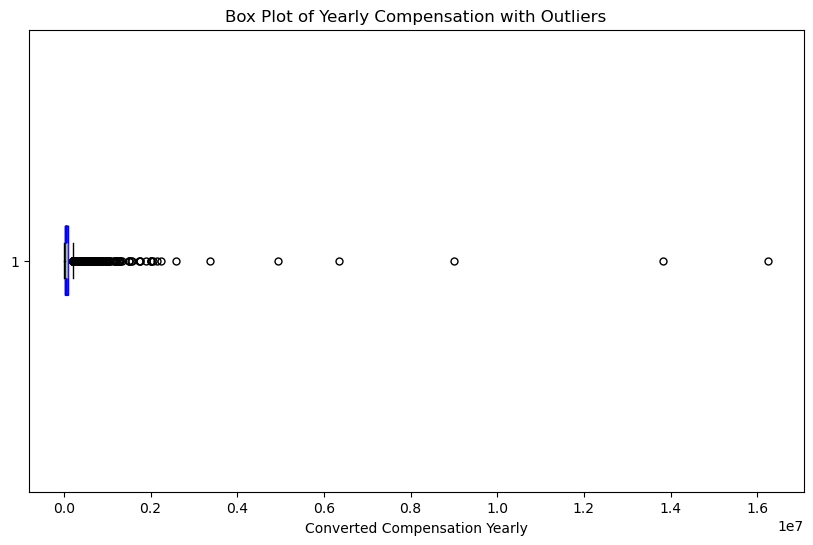

Lower Bound for Outliers: -80177.25
Upper Bound for Outliers: 220860.75
Number of Outliers: 978
Outliers (Top records):
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


In [6]:
# Drop missing values in 'ConvertedCompYearly' to avoid errors
df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
outliers_count = outliers.shape[0]

# Visualize the distribution and outliers using a box plot
plt.figure(figsize=(10,6))
plt.boxplot(df['ConvertedCompYearly'], vert=False, patch_artist=True, notch=True, 
            boxprops=dict(facecolor='skyblue', color='blue'), 
            flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Box Plot of Yearly Compensation with Outliers')
plt.xlabel('Converted Compensation Yearly')

# Display the plot
plt.show()

# Display the results
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of Outliers: {outliers_count}")
print("Outliers (Top records):")
print(outliers[['ConvertedCompYearly']].head())

In [10]:
# Drop missing values in 'ConvertedCompYearly' to avoid errors
df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding the outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame Size: {df.shape}")
print(f"New DataFrame Size (without outliers): {df_no_outliers.shape}")

Original DataFrame Size: (23435, 114)
New DataFrame Size (without outliers): (22457, 114)


In [33]:
# Reload the data
df = pd.read_csv(file_url)

# Check unique values in Age column
print("Unique Age values:")
print(df['Age'].unique())


Unique Age values:
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [34]:
# Define the mapping based on actual categories
age_mapping = {
    '18-24 years': 21,
    '25-34 years': 30,
    '35-44 years': 40,
    '45-54 years': 50,
    '55-64 years': 60,
    '65 years or older': 70,
    'Under 18 years': 16
}

# Apply mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with NaNs in required columns
df_corr = df[['AgeNumeric', 'ConvertedCompYearly']].dropna()

# Print sample and count
print(df_corr.head())
print("\nRows with valid data:", len(df_corr))


      AgeNumeric  ConvertedCompYearly
524         70.0              46185.0
587         70.0             150000.0
725         70.0              57325.0
918         70.0              90000.0
1405        70.0              93244.0

Rows with valid data: 137


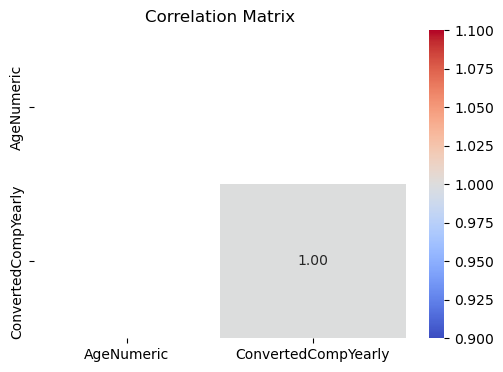

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
